# El modelo diagnostica riesgo cardíaco 
# Si el paciente tiene o no-tiene riesgo cardíaco, a partir de los datos clínicos del paciente
# Los datos clínicos son:  nivel de colesterol, presión arterial, nivel de azúcar en sangre, edad, sobrepeso y tabaquismo 

In [35]:
from tensorflow.keras        import models #Crear/entrenar/evaluar el modelo
from sklearn.model_selection import train_test_split #Para separar train de test
import matplotlib.pyplot as plt #Para graficar
#preproceso los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout #Capas densas para la red
from tensorflow.keras.optimizers import Adam #Optimizador a utilizar


# Leo el set de datos y devuelvo las primeras n filas de un DataFrame (funcion head)

In [36]:
df = pd.read_csv('datos_de_pacientes_5000.csv')

In [37]:
df.head()

,Unnamed: 0,colesterol,presion,glucosa,edad,sobrepeso,tabaquismo,riesgo_cardiaco
0,0,1.0,0.9,1.0,5,0,1,0
1,1,2.4,1.4,1.8,72,0,0,1
2,2,2.2,1.1,0.6,73,0,1,0
3,3,2.2,1.3,1.2,4,0,1,0
4,4,1.8,0.9,1.1,42,0,1,0


# Distribución de frecuencia: 
# utilizando subgráficas(subplot)
# histogramas(hist)
# y con sus correspondientes etiquetas (legend)

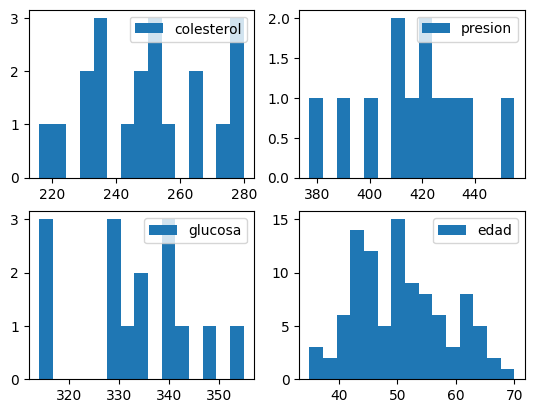

In [38]:
colesterol = df['colesterol'].value_counts()
presion = df['presion'].value_counts()
glucosa = df['glucosa'].value_counts()
edad = df['edad'].value_counts()

plt.subplot(2, 2, 1)
plt.hist([colesterol], bins=15, label=['colesterol'])
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
plt.hist([presion], bins=15, label=['presion'])
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
plt.hist([glucosa], bins=15, label=['glucosa'])
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
plt.hist([edad], bins=15, label=['edad'])
plt.legend(loc='upper right')

plt.show()

<Axes: ylabel='edad'>

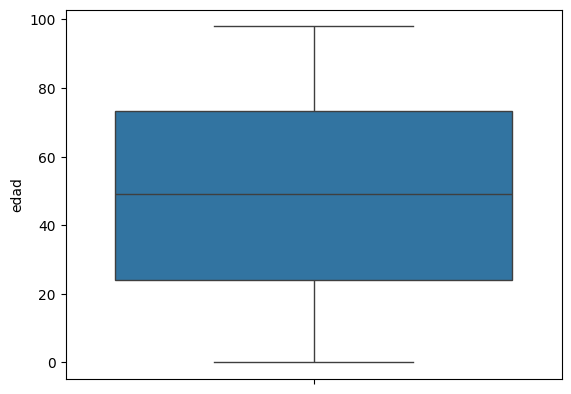

In [39]:
sns.boxplot(df['edad'])

<Axes: ylabel='colesterol'>

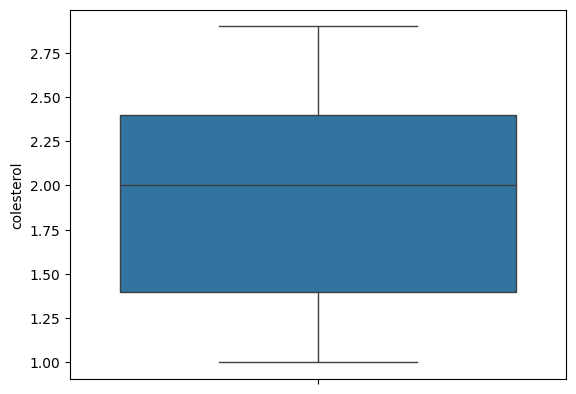

In [40]:
sns.boxplot(df['colesterol'])

<Axes: ylabel='glucosa'>

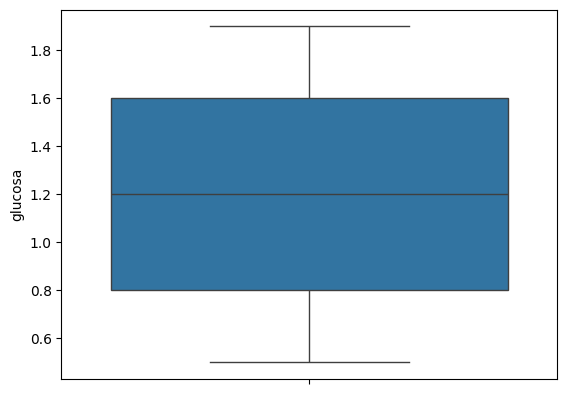

In [41]:
sns.boxplot(df['glucosa'])

<Axes: ylabel='presion'>

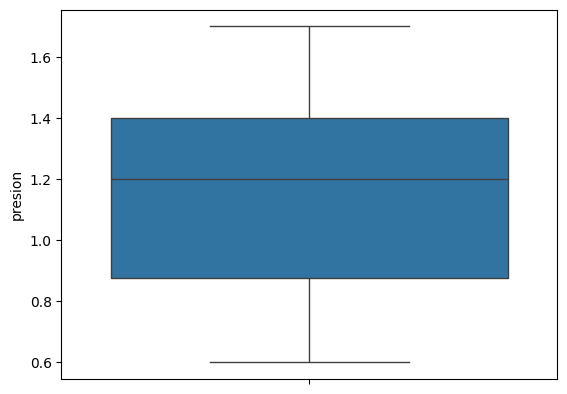

In [42]:
sns.boxplot(df['presion'])

## StandardScaler

StandardScaler removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values as shown in the left figure below. However, the outliers have an influence when computing the empirical mean and standard deviation. Note in particular that because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different: most of the data lie in the [-2, 4] range for the transformed median income feature while the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed average house occupancy.

StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.

In [43]:
###Scaling numerical variables
scaler = StandardScaler()

# Separate the data from the target labels
X = df.drop(['riesgo_cardiaco'], axis=1)
y = np.array(df['riesgo_cardiaco'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#For training set
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)

#For testing set
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)


In [44]:
scaled_X_train.head()

,Unnamed: 0,colesterol,presion,glucosa,edad,sobrepeso,tabaquismo
0,-1.421451,0.613727,-0.442198,0.739099,-0.828158,1.005515,0.994515
1,-0.853909,-0.432324,0.431999,-0.654004,-0.515829,-0.994515,-1.005515
2,-0.392085,1.485435,-0.150799,1.203467,0.525268,-0.994515,-1.005515
3,0.688054,-0.432324,-0.150799,1.203467,-0.238203,1.005515,-1.005515
4,-0.560400,-0.781008,-1.024997,1.435650,-0.168796,1.005515,-1.005515


In [45]:
scaled_X_test.head()

,Unnamed: 0,colesterol,presion,glucosa,edad,sobrepeso,tabaquismo
0,-1.629921,1.358534,-0.116621,-0.038299,-0.759020,-0.978237,-1.018165
1,-1.380169,0.121092,1.615373,-1.414319,-0.404653,-0.978237,0.982159
2,-0.685504,0.297870,-0.405287,1.108384,1.260876,1.022247,-1.018165
3,-1.241645,0.121092,1.038042,-0.038299,-1.467756,1.022247,0.982159
4,0.901718,-0.055685,-1.271284,-0.955646,-0.404653,-0.978237,0.982159


## Logistic Regression

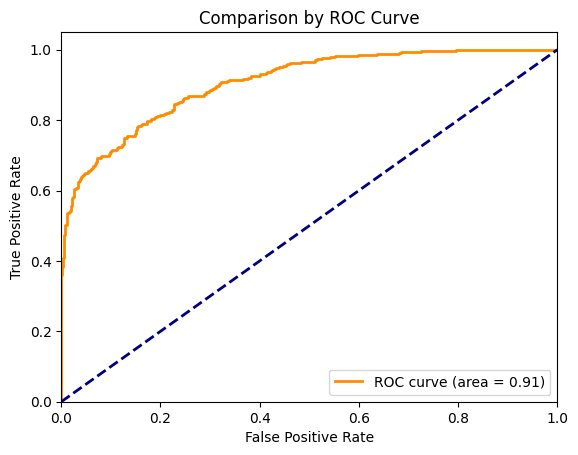

In [46]:
### Complete in this cell: train a logistic regression, assign to `log_reg` variable
log_reg = LogisticRegression(max_iter = 10000, C = 0.01).fit(scaled_X_train, y_train)
lr_predictions = log_reg.predict(scaled_X_test)
lr_predict_proba = log_reg.predict_proba(scaled_X_test)

# Calculate roc_auc_score
lr_roc_auc = roc_auc_score(y_test, lr_predict_proba[:, 1])

# Manually plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, lr_predict_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison by ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
# Example: print the first 5 predictions
print("Predictions:", lr_predictions[:5])
print("Probabilities:", lr_predict_proba[:5])

Predictions: [0 0 1 1 0]
Probabilities: [[0.8580285  0.1419715 ]
 [0.64582043 0.35417957]
 [0.12409079 0.87590921]
 [0.30596251 0.69403749]
 [0.82217725 0.17782275]]


In [48]:
# Normaliza los datos
X_train_norm = normalize(X_train, norm='l2')
X_test_norm = normalize(X_test, norm='l2')


In [49]:
# Define la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(260, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrena el modelo
model.fit(X_train, y_train, epochs=150)


Epoch 1/150
125/125 [==============================] - 1s 861us/step - loss: 6.5167 - accuracy: 0.5120
Epoch 2/150
125/125 [==============================] - 0s 922us/step - loss: 2.7959 - accuracy: 0.5310
Epoch 3/150
125/125 [==============================] - 0s 854us/step - loss: 3.0697 - accuracy: 0.5490
Epoch 4/150
125/125 [==============================] - 0s 915us/step - loss: 2.2836 - accuracy: 0.5380
Epoch 5/150
125/125 [==============================] - 0s 913us/step - loss: 2.5431 - accuracy: 0.5335
Epoch 6/150
125/125 [==============================] - 0s 895us/step - loss: 2.4813 - accuracy: 0.5297
Epoch 7/150
125/125 [==============================] - 0s 882us/step - loss: 1.4934 - accuracy: 0.5583
Epoch 8/150
125/125 [==============================] - 0s 868us/step - loss: 1.9147 - accuracy: 0.5483
Epoch 9/150
125/125 [==============================] - 0s 903us/step - loss: 1.5605 - accuracy: 0.5587
Epoch 10/150
125/125 [==============================] - 0s 2ms/step - los

In [50]:
# Evalua el modelo
score = model.evaluate(X_test, y_test, verbose=0)
print('Precisión:', score[1])


Precisión: 0.7789999842643738


In [51]:
# Prueba individual
prediccion = model.predict( [[1,2.4,1.4,1.8,72,0,0]])
print(prediccion)


1/1 [==============================] - 0s 73ms/step
[[0.94910264]]
